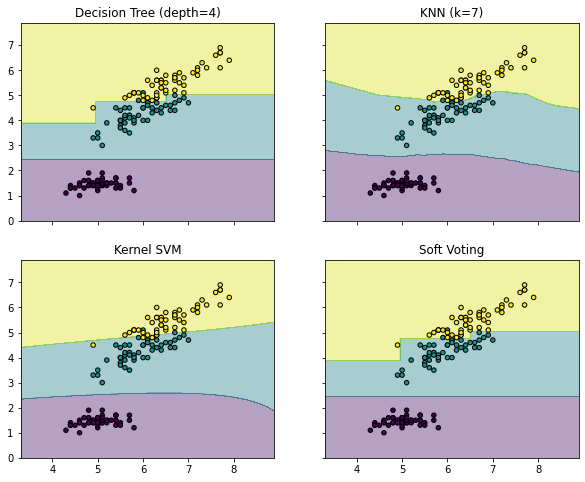

In [16]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X = iris.data[:,[0,2]] #取两列，方便绘图
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt',clf1),('knn',clf2),('svc',clf3)], voting='soft', weights=[2,1,1])
#weights控制每个算法的权重, voting=’soft' 使用了软权重


clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  #创建网格

fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8)) #共享X轴和Y轴

for idx, clf, title in zip(product([0, 1],[0, 1]),
                           [clf1, clf2, clf3, eclf],
                           ['Decision Tree (depth=4)', 'KNN (k=7)',
                            'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #起初我以为是预测的X的值，实际上是预测了上面创建的网格的值，以这些值来进行描绘区域
    Z = Z.reshape(xx.shape)
    axes[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axes[idx[0], idx[1]].scatter(X[:, 0],X[:, 1], c=y, s=20, edgecolor='k')
    axes[idx[0], idx[1]].set_title(title)
plt.show()

In [33]:
import numpy as np
import pandas as pd
import warnings
import json

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

df = pd.read_csv("NewData.csv")
data =df.values

#scaler = MinMaxScaler()
scaler = StandardScaler()
result_feature = scaler.fit_transform(data[:,:18])
result_label = data[:,18]
result = np.append(result_feature, result_label.reshape(len(result_label),1), axis = 1)
df_newdata = pd.DataFrame(result, columns= df.columns)


Y = df_newdata["Outcome"].values
X = df_newdata[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']


sc = 'accuracy'

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

clfrf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)
#clfSVC =  SVC(C= 20, kernel = 'linear', probability= True)
clfSVC = SVC(C= 1, gamma=1, kernel = 'linear', probability= True)
clfGBDT = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
#clfXGBT = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
clfXGBT = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)

df_weights = pd.read_csv("Weight_new.csv")

print(df_weights[df_weights.columns[0]])
df_weights = df_weights.drop([df_weights.columns[0],df_weights.columns[-1]], axis= 1)



0      RF
1     SVM
2    GBDT
3     XGB
Name: blank, dtype: object


In [35]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)    

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:03,  3.91s/it]

[0.89855072 0.84057971 0.82608696 0.86956522 0.89855072 0.89855072
 0.85507246 0.84057971 0.79710145 0.88405797]
0.8608695652173912
[1. 1. 4. 4.]


2it [00:07,  3.67s/it]

[0.86956522 0.85507246 0.91304348 0.82608696 0.82608696 0.79710145
 0.82608696 0.86956522 0.85507246 0.89855072]
0.8536231884057972
[1. 1. 5. 3.]


3it [00:10,  3.54s/it]

[0.92753623 0.88405797 0.88405797 0.8115942  0.95652174 0.91304348
 0.92753623 0.7826087  0.92753623 0.82608696]
0.8840579710144926
[1. 2. 2. 5.]


4it [00:14,  3.53s/it]

[0.89855072 0.86956522 0.85507246 0.92753623 0.88405797 0.88405797
 0.88405797 0.8115942  0.85507246 0.85507246]
0.8724637681159422
[1. 2. 3. 4.]


5it [00:17,  3.50s/it]

[0.86956522 0.85507246 0.82608696 0.86956522 0.88405797 0.84057971
 0.91304348 0.88405797 0.82608696 0.79710145]
0.8565217391304347
[1. 2. 4. 3.]


6it [00:21,  3.46s/it]

[0.85507246 0.89855072 0.88405797 0.85507246 0.85507246 0.91304348
 0.85507246 0.88405797 0.91304348 0.91304348]
0.882608695652174
[1. 2. 5. 2.]


7it [00:24,  3.51s/it]

[0.91304348 0.84057971 0.84057971 0.89855072 0.8115942  0.92753623
 0.7826087  0.86956522 0.89855072 0.82608696]
0.8608695652173912
[1. 3. 1. 5.]


8it [00:28,  3.49s/it]

[0.91304348 0.89855072 0.86956522 0.88405797 0.84057971 0.86956522
 0.91304348 0.86956522 0.82608696 0.89855072]
0.8782608695652174
[1. 3. 2. 4.]


9it [00:31,  3.55s/it]

[0.84057971 0.86956522 0.84057971 0.85507246 0.92753623 0.89855072
 0.85507246 0.79710145 0.86956522 0.85507246]
0.8608695652173912
[1. 3. 3. 3.]


10it [00:35,  3.52s/it]

[0.85507246 0.82608696 0.86956522 0.88405797 0.82608696 0.8115942
 0.85507246 0.91304348 0.89855072 0.91304348]
0.8652173913043477
[1. 3. 4. 2.]


11it [00:39,  3.57s/it]

[0.89855072 0.94202899 0.85507246 0.7826087  0.91304348 0.79710145
 0.88405797 0.88405797 0.82608696 0.84057971]
0.8623188405797102
[1. 3. 5. 1.]


12it [00:42,  3.56s/it]

[0.89855072 0.91304348 0.86956522 0.88405797 0.86956522 0.89855072
 0.91304348 0.86956522 0.86956522 0.86956522]
0.8855072463768117
[1. 4. 1. 4.]


13it [00:46,  3.59s/it]

[0.86956522 0.86956522 0.91304348 0.85507246 0.7826087  0.84057971
 0.84057971 0.95652174 0.86956522 0.91304348]
0.8710144927536232
[1. 4. 2. 3.]


14it [00:49,  3.50s/it]

[0.88405797 0.7826087  0.92753623 0.86956522 0.8115942  0.84057971
 0.88405797 0.92753623 0.84057971 0.84057971]
0.8608695652173914
[1. 4. 3. 2.]


15it [00:53,  3.68s/it]

[0.85507246 0.88405797 0.89855072 0.8115942  0.84057971 0.84057971
 0.92753623 0.85507246 0.95652174 0.88405797]
0.8753623188405797
[1. 4. 4. 1.]


16it [00:57,  3.60s/it]

[0.91304348 0.86956522 0.76811594 0.91304348 0.89855072 0.91304348
 0.88405797 0.89855072 0.84057971 0.85507246]
0.8753623188405797
[1. 5. 1. 3.]


17it [01:00,  3.71s/it]

[0.82608696 0.88405797 0.7826087  0.7826087  0.91304348 0.79710145
 0.86956522 0.85507246 0.89855072 0.88405797]
0.8492753623188406
[1. 5. 2. 2.]


18it [01:05,  3.82s/it]

[0.86956522 0.89855072 0.89855072 0.91304348 0.91304348 0.85507246
 0.89855072 0.82608696 0.88405797 0.97101449]
0.8927536231884059
[1. 5. 3. 1.]


19it [01:09,  3.91s/it]

[0.82608696 0.88405797 0.86956522 0.88405797 0.84057971 0.76811594
 0.86956522 0.86956522 0.8115942  0.84057971]
0.846376811594203
[2. 1. 2. 5.]


20it [01:12,  3.78s/it]

[0.89855072 0.85507246 0.89855072 0.91304348 0.84057971 0.94202899
 0.88405797 0.82608696 0.85507246 0.89855072]
0.881159420289855
[2. 1. 3. 4.]


21it [01:16,  3.72s/it]

[0.75362319 0.86956522 0.88405797 0.91304348 0.85507246 0.84057971
 0.86956522 0.7826087  0.86956522 0.88405797]
0.8521739130434783
[2. 1. 4. 3.]


22it [01:19,  3.64s/it]

[0.86956522 0.88405797 0.91304348 0.85507246 0.85507246 0.75362319
 0.84057971 0.86956522 0.88405797 0.88405797]
0.8608695652173914
[2. 1. 5. 2.]


23it [01:23,  3.62s/it]

[0.91304348 0.89855072 0.89855072 0.89855072 0.85507246 0.85507246
 0.94202899 0.88405797 0.86956522 0.7826087 ]
0.8797101449275363
[2. 2. 1. 5.]


24it [01:26,  3.57s/it]

[0.84057971 0.84057971 0.85507246 0.86956522 0.84057971 0.86956522
 0.91304348 0.89855072 0.89855072 0.91304348]
0.8739130434782607
[2. 2. 2. 4.]


25it [01:29,  3.47s/it]

[0.85507246 0.8115942  0.91304348 0.88405797 0.88405797 0.85507246
 0.92753623 0.92753623 0.82608696 0.88405797]
0.8768115942028984
[2. 2. 3. 3.]


26it [01:33,  3.51s/it]

[0.94202899 0.79710145 0.79710145 0.82608696 0.85507246 0.91304348
 0.92753623 0.86956522 0.8115942  0.94202899]
0.8681159420289856
[2. 2. 4. 2.]


27it [01:37,  3.52s/it]

[0.88405797 0.92753623 0.86956522 0.79710145 0.91304348 0.86956522
 0.89855072 0.88405797 0.84057971 0.91304348]
0.8797101449275363
[2. 2. 5. 1.]


28it [01:40,  3.57s/it]

[0.91304348 0.88405797 0.82608696 0.86956522 0.88405797 0.91304348
 0.86956522 0.89855072 0.88405797 0.88405797]
0.882608695652174
[2. 3. 1. 4.]


29it [01:44,  3.65s/it]

[0.7826087  0.86956522 0.84057971 0.89855072 0.88405797 0.86956522
 0.92753623 0.86956522 0.89855072 0.92753623]
0.8768115942028987
[2. 3. 2. 3.]


30it [01:48,  3.62s/it]

[0.91304348 0.86956522 0.91304348 0.91304348 0.7826087  0.76811594
 0.85507246 0.84057971 0.86956522 0.84057971]
0.8565217391304347
[2. 3. 3. 2.]


31it [01:51,  3.55s/it]

[0.85507246 0.88405797 0.86956522 0.85507246 0.88405797 0.92753623
 0.88405797 0.82608696 0.91304348 0.92753623]
0.882608695652174
[2. 3. 4. 1.]


32it [01:55,  3.65s/it]

[0.84057971 0.86956522 0.85507246 0.94202899 0.88405797 0.89855072
 0.88405797 0.89855072 0.89855072 0.85507246]
0.8826086956521738
[2. 4. 1. 3.]


33it [01:59,  3.64s/it]

[0.94202899 0.88405797 0.82608696 0.91304348 0.84057971 0.89855072
 0.84057971 0.86956522 0.88405797 0.86956522]
0.8768115942028987
[2. 4. 2. 2.]


34it [02:02,  3.61s/it]

[0.89855072 0.91304348 0.82608696 0.91304348 0.85507246 0.84057971
 0.8115942  0.88405797 0.88405797 0.84057971]
0.8666666666666668
[2. 4. 3. 1.]


35it [02:06,  3.72s/it]

[0.85507246 0.84057971 0.91304348 0.73913043 0.88405797 0.91304348
 0.85507246 0.92753623 0.89855072 0.89855072]
0.872463768115942
[2. 5. 1. 2.]


36it [02:10,  3.75s/it]

[0.88405797 0.79710145 0.86956522 0.84057971 0.86956522 0.91304348
 0.84057971 0.86956522 0.82608696 0.88405797]
0.8594202898550725
[2. 5. 2. 1.]


37it [02:13,  3.67s/it]

[0.86956522 0.86956522 0.85507246 0.98550725 0.92753623 0.91304348
 0.85507246 0.89855072 0.86956522 0.86956522]
0.8913043478260869
[3. 1. 1. 5.]


38it [02:17,  3.56s/it]

[0.86956522 0.82608696 0.8115942  0.88405797 0.85507246 0.82608696
 0.88405797 0.88405797 0.7826087  0.91304348]
0.8536231884057972
[3. 1. 2. 4.]


39it [02:20,  3.59s/it]

[0.94202899 0.88405797 0.82608696 0.85507246 0.79710145 0.7826087
 0.88405797 0.85507246 0.84057971 0.91304348]
0.8579710144927537
[3. 1. 3. 3.]


40it [02:24,  3.50s/it]

[0.91304348 0.89855072 0.85507246 0.84057971 0.92753623 0.88405797
 0.8115942  0.82608696 0.89855072 0.79710145]
0.865217391304348
[3. 1. 4. 2.]


41it [02:27,  3.52s/it]

[0.89855072 0.92753623 0.88405797 0.88405797 0.88405797 0.82608696
 0.88405797 0.89855072 0.88405797 0.91304348]
0.8884057971014494
[3. 1. 5. 1.]


42it [02:31,  3.50s/it]

[0.94202899 0.85507246 0.85507246 0.84057971 0.86956522 0.7826087
 0.88405797 0.85507246 0.88405797 0.88405797]
0.865217391304348
[3. 2. 1. 4.]


43it [02:34,  3.54s/it]

[0.86956522 0.82608696 0.91304348 0.91304348 0.94202899 0.91304348
 0.86956522 0.88405797 0.82608696 0.85507246]
0.881159420289855
[3. 2. 2. 3.]


44it [02:38,  3.71s/it]

[0.85507246 0.92753623 0.89855072 0.86956522 0.86956522 0.86956522
 0.92753623 0.89855072 0.8115942  0.79710145]
0.8724637681159422
[3. 2. 3. 2.]


45it [02:42,  3.73s/it]

[0.88405797 0.92753623 0.86956522 0.92753623 0.88405797 0.88405797
 0.88405797 0.92753623 0.85507246 0.85507246]
0.8898550724637682
[3. 2. 4. 1.]


46it [02:46,  3.70s/it]

[0.84057971 0.8115942  0.89855072 0.84057971 0.89855072 0.91304348
 0.82608696 0.86956522 0.86956522 0.84057971]
0.8608695652173912
[3. 3. 1. 3.]


47it [02:50,  3.82s/it]

[0.85507246 0.85507246 0.85507246 0.91304348 0.89855072 0.79710145
 0.82608696 0.88405797 0.86956522 0.91304348]
0.8666666666666668
[3. 3. 2. 2.]


48it [02:54,  3.84s/it]

[0.8115942  0.84057971 0.82608696 0.91304348 0.88405797 0.7826087
 0.86956522 0.91304348 0.82608696 0.88405797]
0.855072463768116
[3. 3. 3. 1.]


49it [02:57,  3.74s/it]

[0.89855072 0.89855072 0.84057971 0.86956522 0.94202899 0.76811594
 0.91304348 0.85507246 0.91304348 0.89855072]
0.8797101449275362
[3. 4. 1. 2.]


50it [03:01,  3.70s/it]

[0.91304348 0.84057971 0.86956522 0.86956522 0.89855072 0.86956522
 0.88405797 0.84057971 0.86956522 0.88405797]
0.8739130434782609
[3. 4. 2. 1.]


51it [03:05,  3.69s/it]

[0.92753623 0.7826087  0.8115942  0.88405797 0.7826087  0.79710145
 0.84057971 0.88405797 0.75362319 0.85507246]
0.8318840579710145
[3. 5. 1. 1.]


52it [03:08,  3.75s/it]

[0.86956522 0.88405797 0.86956522 0.86956522 0.91304348 0.84057971
 0.84057971 0.85507246 0.84057971 0.95652174]
0.8739130434782609
[4. 1. 1. 4.]


53it [03:12,  3.63s/it]

[0.91304348 0.84057971 0.85507246 0.86956522 0.91304348 0.85507246
 0.84057971 0.86956522 0.89855072 0.86956522]
0.8724637681159422
[4. 1. 2. 3.]


54it [03:16,  3.70s/it]

[0.88405797 0.86956522 0.82608696 0.88405797 0.85507246 0.91304348
 0.89855072 0.89855072 0.85507246 0.82608696]
0.8710144927536232
[4. 1. 3. 2.]


55it [03:20,  3.92s/it]

[0.88405797 0.88405797 0.85507246 0.89855072 0.8115942  0.91304348
 0.91304348 0.92753623 0.89855072 0.91304348]
0.8898550724637679
[4. 1. 4. 1.]


56it [03:24,  3.91s/it]

[0.88405797 0.89855072 0.8115942  0.84057971 0.89855072 0.89855072
 0.79710145 0.86956522 0.82608696 0.89855072]
0.8623188405797103
[4. 2. 1. 3.]


57it [03:28,  3.87s/it]

[0.89855072 0.7826087  0.88405797 0.88405797 0.91304348 0.94202899
 0.92753623 0.86956522 0.94202899 0.85507246]
0.8898550724637679
[4. 2. 2. 2.]


58it [03:31,  3.83s/it]

[0.94202899 0.85507246 0.92753623 0.84057971 0.85507246 0.85507246
 0.85507246 0.84057971 0.84057971 0.85507246]
0.8666666666666668
[4. 2. 3. 1.]


59it [03:35,  3.74s/it]

[0.82608696 0.86956522 0.92753623 0.94202899 0.91304348 0.88405797
 0.85507246 0.88405797 0.84057971 0.86956522]
0.881159420289855
[4. 3. 1. 2.]


60it [03:39,  3.70s/it]

[0.89855072 0.89855072 0.85507246 0.89855072 0.88405797 0.86956522
 0.88405797 0.86956522 0.86956522 0.97101449]
0.8898550724637684
[4. 3. 2. 1.]


61it [03:43,  3.78s/it]

[0.89855072 0.82608696 0.92753623 0.89855072 0.82608696 0.84057971
 0.86956522 0.88405797 0.88405797 0.84057971]
0.8695652173913044
[4. 4. 1. 1.]


62it [03:46,  3.71s/it]

[0.86956522 0.89855072 0.88405797 0.88405797 0.88405797 0.91304348
 0.82608696 0.88405797 0.88405797 0.89855072]
0.882608695652174
[5. 1. 1. 3.]


63it [03:50,  3.70s/it]

[0.88405797 0.89855072 0.86956522 0.89855072 0.91304348 0.85507246
 0.7826087  0.85507246 0.85507246 0.84057971]
0.8652173913043478
[5. 1. 2. 2.]


64it [03:54,  3.75s/it]

[0.85507246 0.86956522 0.85507246 0.92753623 0.91304348 0.89855072
 0.85507246 0.85507246 0.8115942  0.89855072]
0.8739130434782609
[5. 1. 3. 1.]


65it [03:57,  3.65s/it]

[0.88405797 0.79710145 0.89855072 0.92753623 0.82608696 0.7826087
 0.89855072 0.86956522 0.92753623 0.89855072]
0.8710144927536231
[5. 2. 1. 2.]


66it [04:01,  3.59s/it]

[0.85507246 0.89855072 0.85507246 0.88405797 0.92753623 0.86956522
 0.88405797 0.86956522 0.97101449 0.8115942 ]
0.882608695652174
[5. 2. 2. 1.]


67it [04:04,  3.65s/it]

[0.89855072 0.84057971 0.85507246 0.92753623 0.86956522 0.86956522
 0.91304348 0.84057971 0.82608696 0.84057971]
0.8681159420289856
0.8927536231884059 [1. 5. 2. 2.]


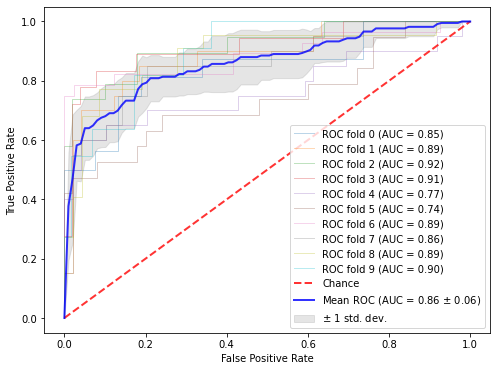

In [37]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [26]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:04,  4.92s/it]

[0.91304348 0.85507246 0.86956522 0.86956522 0.91304348 0.84057971
 0.85507246 0.82608696 0.88405797 0.88405797]
0.8710144927536232
[1. 1. 4. 4.]


2it [00:08,  4.28s/it]

[0.88405797 0.91304348 0.94202899 0.92753623 0.91304348 0.84057971
 0.7826087  0.84057971 0.91304348 0.89855072]
0.8855072463768116
[1. 1. 5. 3.]


3it [00:13,  4.31s/it]

[0.8115942  0.82608696 0.89855072 0.88405797 0.75362319 0.86956522
 0.95652174 0.8115942  0.88405797 0.88405797]
0.8579710144927537
[1. 2. 2. 5.]


4it [00:16,  4.05s/it]

[0.88405797 0.88405797 0.84057971 0.86956522 0.84057971 0.85507246
 0.8115942  0.82608696 0.89855072 0.88405797]
0.8594202898550725
[1. 2. 3. 4.]


5it [00:21,  4.14s/it]

[0.84057971 0.73913043 0.86956522 0.8115942  0.84057971 0.86956522
 0.91304348 0.82608696 0.84057971 0.85507246]
0.8405797101449275
[1. 2. 4. 3.]


6it [00:24,  3.92s/it]

[0.88405797 0.89855072 0.89855072 0.92753623 0.89855072 0.8115942
 0.85507246 0.72463768 0.84057971 0.82608696]
0.8565217391304347
[1. 2. 5. 2.]


7it [00:28,  3.95s/it]

[0.94202899 0.89855072 0.88405797 0.79710145 0.89855072 0.8115942
 0.8115942  0.84057971 0.84057971 0.88405797]
0.8608695652173914
[1. 3. 1. 5.]


8it [00:32,  3.87s/it]

[0.86956522 0.86956522 0.8115942  0.8115942  0.95652174 0.85507246
 0.79710145 0.86956522 0.86956522 0.86956522]
0.8579710144927537
[1. 3. 2. 4.]


9it [00:36,  3.85s/it]

[0.92753623 0.88405797 0.88405797 0.89855072 0.85507246 0.85507246
 0.84057971 0.85507246 0.84057971 0.86956522]
0.8710144927536232
[1. 3. 3. 3.]


10it [00:39,  3.83s/it]

[0.86956522 0.92753623 0.86956522 0.84057971 0.85507246 0.89855072
 0.88405797 0.92753623 0.84057971 0.85507246]
0.8768115942028984
[1. 3. 4. 2.]


11it [00:43,  3.74s/it]

[0.84057971 0.85507246 0.82608696 0.88405797 0.89855072 0.82608696
 0.85507246 0.89855072 0.86956522 0.85507246]
0.8608695652173914
[1. 3. 5. 1.]


12it [00:47,  3.73s/it]

[0.95652174 0.86956522 0.79710145 0.8115942  0.85507246 0.85507246
 0.86956522 0.94202899 0.7826087  0.88405797]
0.8623188405797102
[1. 4. 1. 4.]


13it [00:51,  3.86s/it]

[0.91304348 0.85507246 0.84057971 0.91304348 0.82608696 0.88405797
 0.84057971 0.88405797 0.86956522 0.89855072]
0.8724637681159422
[1. 4. 2. 3.]


14it [00:54,  3.68s/it]

[0.82608696 0.85507246 0.82608696 0.85507246 0.89855072 0.92753623
 0.86956522 0.85507246 0.89855072 0.86956522]
0.8681159420289856
[1. 4. 3. 2.]


15it [00:57,  3.60s/it]

[0.89855072 0.84057971 0.84057971 0.86956522 0.82608696 0.86956522
 0.82608696 0.86956522 0.86956522 0.88405797]
0.8594202898550725
[1. 4. 4. 1.]


16it [01:01,  3.59s/it]

[0.82608696 0.85507246 0.91304348 0.92753623 0.89855072 0.89855072
 0.88405797 0.86956522 0.86956522 0.91304348]
0.8855072463768117
[1. 5. 1. 3.]


17it [01:05,  3.65s/it]

[0.88405797 0.86956522 0.89855072 0.88405797 0.82608696 0.88405797
 0.88405797 0.86956522 0.84057971 0.95652174]
0.8797101449275363
[1. 5. 2. 2.]


18it [01:08,  3.59s/it]

[0.89855072 0.85507246 0.82608696 0.84057971 0.89855072 0.84057971
 0.89855072 0.91304348 0.85507246 0.92753623]
0.8753623188405797
[1. 5. 3. 1.]


19it [01:12,  3.67s/it]

[0.88405797 0.89855072 0.79710145 0.82608696 0.89855072 0.85507246
 0.86956522 0.88405797 0.85507246 0.88405797]
0.865217391304348
[2. 1. 2. 5.]


20it [01:16,  3.60s/it]

[0.91304348 0.89855072 0.91304348 0.88405797 0.84057971 0.86956522
 0.85507246 0.89855072 0.84057971 0.86956522]
0.8782608695652175
[2. 1. 3. 4.]


21it [01:20,  3.76s/it]

[0.86956522 0.85507246 0.89855072 0.84057971 0.88405797 0.86956522
 0.91304348 0.85507246 0.89855072 0.82608696]
0.8710144927536232
[2. 1. 4. 3.]


22it [01:23,  3.67s/it]

[0.89855072 0.86956522 0.84057971 0.82608696 0.86956522 0.88405797
 0.85507246 0.86956522 0.7826087  0.89855072]
0.8594202898550727
[2. 1. 5. 2.]


23it [01:27,  3.64s/it]

[0.85507246 0.88405797 0.84057971 0.8115942  0.89855072 0.79710145
 0.89855072 0.92753623 0.86956522 0.88405797]
0.8666666666666666
[2. 2. 1. 5.]


24it [01:30,  3.65s/it]

[0.91304348 0.89855072 0.89855072 0.84057971 0.85507246 0.86956522
 0.84057971 0.89855072 0.85507246 0.88405797]
0.8753623188405799
[2. 2. 2. 4.]


25it [01:34,  3.75s/it]

[0.8115942  0.86956522 0.86956522 0.84057971 0.84057971 0.88405797
 0.86956522 0.84057971 0.84057971 0.92753623]
0.8594202898550727
[2. 2. 3. 3.]


26it [01:38,  3.72s/it]

[0.84057971 0.85507246 0.91304348 0.85507246 0.86956522 0.82608696
 0.84057971 0.89855072 0.89855072 0.91304348]
0.8710144927536232
[2. 2. 4. 2.]


27it [01:41,  3.61s/it]

[0.86956522 0.82608696 0.82608696 0.89855072 0.91304348 0.8115942
 0.85507246 0.84057971 0.85507246 0.79710145]
0.8492753623188406
[2. 2. 5. 1.]


28it [01:45,  3.67s/it]

[0.85507246 0.89855072 0.88405797 0.92753623 0.79710145 0.88405797
 0.88405797 0.82608696 0.92753623 0.84057971]
0.8724637681159422
[2. 3. 1. 4.]


29it [01:49,  3.67s/it]

[0.79710145 0.91304348 0.88405797 0.84057971 0.84057971 0.89855072
 0.91304348 0.84057971 0.85507246 0.88405797]
0.8666666666666668
[2. 3. 2. 3.]


30it [01:53,  3.80s/it]

[0.88405797 0.86956522 0.85507246 0.82608696 0.86956522 0.84057971
 0.72463768 0.88405797 0.85507246 0.95652174]
0.856521739130435
[2. 3. 3. 2.]


31it [01:57,  3.73s/it]

[0.89855072 0.89855072 0.82608696 0.88405797 0.88405797 0.82608696
 0.76811594 0.88405797 0.85507246 0.91304348]
0.8637681159420291
[2. 3. 4. 1.]


32it [02:00,  3.74s/it]

[0.88405797 0.7826087  0.85507246 0.88405797 0.86956522 0.92753623
 0.89855072 0.89855072 0.84057971 0.84057971]
0.8681159420289856
[2. 4. 1. 3.]


33it [02:04,  3.63s/it]

[0.91304348 0.85507246 0.8115942  0.84057971 0.92753623 0.88405797
 0.88405797 0.89855072 0.86956522 0.85507246]
0.8739130434782609
[2. 4. 2. 2.]


34it [02:07,  3.61s/it]

[0.89855072 0.89855072 0.86956522 0.85507246 0.88405797 0.86956522
 0.84057971 0.88405797 0.85507246 0.86956522]
0.8724637681159422
[2. 4. 3. 1.]


35it [02:11,  3.70s/it]

[0.79710145 0.84057971 0.85507246 0.91304348 0.91304348 0.94202899
 0.89855072 0.84057971 0.88405797 0.86956522]
0.8753623188405797
[2. 5. 1. 2.]


36it [02:15,  3.79s/it]

[0.85507246 0.8115942  0.85507246 0.92753623 0.89855072 0.86956522
 0.88405797 0.85507246 0.88405797 0.82608696]
0.8666666666666668
[2. 5. 2. 1.]


37it [02:19,  3.76s/it]

[0.89855072 0.86956522 0.89855072 0.85507246 0.91304348 0.85507246
 0.85507246 0.89855072 0.95652174 0.92753623]
0.8927536231884057
[3. 1. 1. 5.]


38it [02:22,  3.62s/it]

[0.84057971 0.91304348 0.88405797 0.84057971 0.82608696 0.88405797
 0.84057971 0.89855072 0.89855072 0.89855072]
0.8724637681159422
[3. 1. 2. 4.]


39it [02:26,  3.59s/it]

[0.85507246 0.91304348 0.89855072 0.84057971 0.7826087  0.8115942
 0.91304348 0.7826087  0.84057971 0.82608696]
0.8463768115942027
[3. 1. 3. 3.]


40it [02:30,  3.70s/it]

[0.86956522 0.86956522 0.89855072 0.84057971 0.92753623 0.95652174
 0.8115942  0.85507246 0.92753623 0.8115942 ]
0.8768115942028984
[3. 1. 4. 2.]


41it [02:33,  3.67s/it]

[0.82608696 0.86956522 0.88405797 0.89855072 0.86956522 0.89855072
 0.8115942  0.88405797 0.92753623 0.86956522]
0.8739130434782609
[3. 1. 5. 1.]


42it [02:37,  3.71s/it]

[0.92753623 0.89855072 0.85507246 0.86956522 0.86956522 0.85507246
 0.89855072 0.86956522 0.86956522 0.82608696]
0.8739130434782609
[3. 2. 1. 4.]


43it [02:41,  3.80s/it]

[0.86956522 0.91304348 0.85507246 0.88405797 0.85507246 0.88405797
 0.76811594 0.88405797 0.86956522 0.88405797]
0.8666666666666668
[3. 2. 2. 3.]


44it [02:44,  3.67s/it]

[0.82608696 0.7826087  0.86956522 0.89855072 0.88405797 0.91304348
 0.82608696 0.92753623 0.86956522 0.84057971]
0.863768115942029
[3. 2. 3. 2.]


45it [02:48,  3.64s/it]

[0.91304348 0.82608696 0.86956522 0.84057971 0.86956522 0.85507246
 0.85507246 0.91304348 0.88405797 0.85507246]
0.8681159420289856
[3. 2. 4. 1.]


46it [02:52,  3.85s/it]

[0.91304348 0.91304348 0.92753623 0.84057971 0.88405797 0.89855072
 0.84057971 0.91304348 0.88405797 0.85507246]
0.8869565217391303
[3. 3. 1. 3.]


47it [02:56,  3.87s/it]

[0.85507246 0.85507246 0.86956522 0.86956522 0.84057971 0.91304348
 0.88405797 0.88405797 0.88405797 0.86956522]
0.872463768115942
[3. 3. 2. 2.]


48it [03:00,  3.81s/it]

[0.92753623 0.8115942  0.84057971 0.89855072 0.8115942  0.82608696
 0.89855072 0.85507246 0.92753623 0.84057971]
0.863768115942029
[3. 3. 3. 1.]


49it [03:03,  3.72s/it]

[0.82608696 0.92753623 0.85507246 0.76811594 0.88405797 0.89855072
 0.89855072 0.82608696 0.86956522 0.85507246]
0.8608695652173914
[3. 4. 1. 2.]


50it [03:07,  3.69s/it]

[0.84057971 0.86956522 0.88405797 0.89855072 0.94202899 0.86956522
 0.82608696 0.79710145 0.88405797 0.91304348]
0.8724637681159422
[3. 4. 2. 1.]


51it [03:10,  3.61s/it]

[0.84057971 0.84057971 0.85507246 0.8115942  0.85507246 0.8115942
 0.92753623 0.88405797 0.89855072 0.82608696]
0.8550724637681159
[3. 5. 1. 1.]


52it [03:14,  3.61s/it]

[0.82608696 0.8115942  0.86956522 0.85507246 0.89855072 0.75362319
 0.94202899 0.88405797 0.91304348 0.7826087 ]
0.8536231884057971
[4. 1. 1. 4.]


53it [03:18,  3.63s/it]

[0.92753623 0.91304348 0.84057971 0.89855072 0.92753623 0.86956522
 0.89855072 0.86956522 0.8115942  0.82608696]
0.8782608695652174
[4. 1. 2. 3.]


54it [03:21,  3.63s/it]

[0.84057971 0.86956522 0.89855072 0.88405797 0.95652174 0.84057971
 0.85507246 0.79710145 0.89855072 0.86956522]
0.8710144927536232
[4. 1. 3. 2.]


55it [03:25,  3.69s/it]

[0.86956522 0.86956522 0.88405797 0.85507246 0.86956522 0.85507246
 0.85507246 0.84057971 0.86956522 0.86956522]
0.8637681159420291
[4. 1. 4. 1.]


56it [03:29,  3.60s/it]

[0.85507246 0.88405797 0.88405797 0.94202899 0.84057971 0.85507246
 0.8115942  0.84057971 0.88405797 0.85507246]
0.8652173913043478
[4. 2. 1. 3.]


57it [03:33,  3.72s/it]

[0.88405797 0.91304348 0.95652174 0.95652174 0.91304348 0.89855072
 0.84057971 0.92753623 0.92753623 0.89855072]
0.9115942028985506
[4. 2. 2. 2.]


58it [03:36,  3.69s/it]

[0.85507246 0.8115942  0.82608696 0.88405797 0.92753623 0.92753623
 0.85507246 0.89855072 0.91304348 0.91304348]
0.8811594202898549
[4. 2. 3. 1.]


59it [03:40,  3.60s/it]

[0.86956522 0.89855072 0.8115942  0.86956522 0.86956522 0.82608696
 0.88405797 0.82608696 0.86956522 0.88405797]
0.8608695652173914
[4. 3. 1. 2.]


60it [03:43,  3.66s/it]

[0.8115942  0.89855072 0.84057971 0.84057971 0.84057971 0.86956522
 0.91304348 0.86956522 0.79710145 0.85507246]
0.8536231884057971
[4. 3. 2. 1.]


61it [03:47,  3.65s/it]

[0.88405797 0.89855072 0.82608696 0.85507246 0.86956522 0.82608696
 0.85507246 0.84057971 0.89855072 0.94202899]
0.8695652173913044
[4. 4. 1. 1.]


62it [03:50,  3.59s/it]

[0.85507246 0.79710145 0.94202899 0.79710145 0.86956522 0.86956522
 0.88405797 0.84057971 0.85507246 0.91304348]
0.8623188405797103
[5. 1. 1. 3.]


63it [03:54,  3.62s/it]

[0.86956522 0.84057971 0.86956522 0.84057971 0.82608696 0.89855072
 0.92753623 0.88405797 0.92753623 0.82608696]
0.8710144927536232
[5. 1. 2. 2.]


64it [03:58,  3.75s/it]

[0.86956522 0.8115942  0.92753623 0.86956522 0.85507246 0.92753623
 0.82608696 0.85507246 0.89855072 0.88405797]
0.872463768115942
[5. 1. 3. 1.]


65it [04:02,  3.66s/it]

[0.89855072 0.85507246 0.8115942  0.86956522 0.86956522 0.84057971
 0.91304348 0.85507246 0.84057971 0.92753623]
0.8681159420289856
[5. 2. 1. 2.]


66it [04:05,  3.66s/it]

[0.91304348 0.91304348 0.92753623 0.88405797 0.89855072 0.91304348
 0.92753623 0.94202899 0.8115942  0.91304348]
0.9043478260869564
[5. 2. 2. 1.]


67it [04:09,  3.72s/it]

[0.88405797 0.7826087  0.86956522 0.84057971 0.89855072 0.88405797
 0.84057971 0.91304348 0.92753623 0.92753623]
0.8768115942028987
0.9115942028985506 [4. 2. 1. 3.]


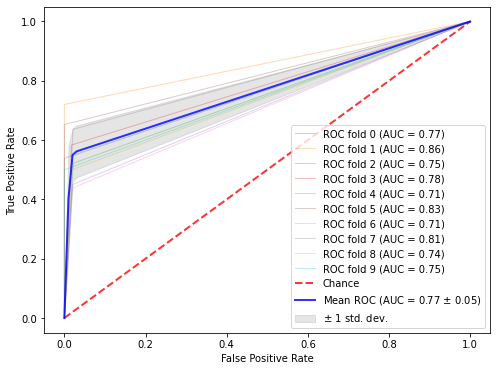

In [ ]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict(X[test])
    # y_score.shape==(75, 3)
    if len(y_score.shape)<= 1 :
        y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_score[:,0]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [ ]:
Y[test]

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])